In [ ]:
# Essentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# create test set
from sklearn.model_selection import train_test_split

# to keep track of training time
import datetime

# standard scaler
from sklearn.preprocessing import StandardScaler

# logistic regression model
from sklearn.linear_model import LogisticRegression


# metrics used for evaluation
from sklearn.metrics import f1_score, matthews_corrcoef

# visualizations
from yellowbrick.classifier import ClassPredictionError, ConfusionMatrix
#from sklearn.metrics import plot_roc_curve

# KNN imputation
from sklearn.impute import KNNImputer

# normalizer
from sklearn.preprocessing import Normalizer

# variance threshold
from sklearn.feature_selection import VarianceThreshold

# RFECV
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import RFECV

# random forest
from sklearn.ensemble import RandomForestClassifier

# evaluation metric
from sklearn.metrics import matthews_corrcoef, make_scorer

import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import missingno as msno
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
uci_secom = pd.read_csv('/content/drive/MyDrive/capstone/uci-secom.csv')
print(f'Whoa! There are {uci_secom.shape[0]} records with {uci_secom.shape[1]} features!')
n_features0 = uci_secom.shape[1]

Whoa! There are 1567 records with 592 features!


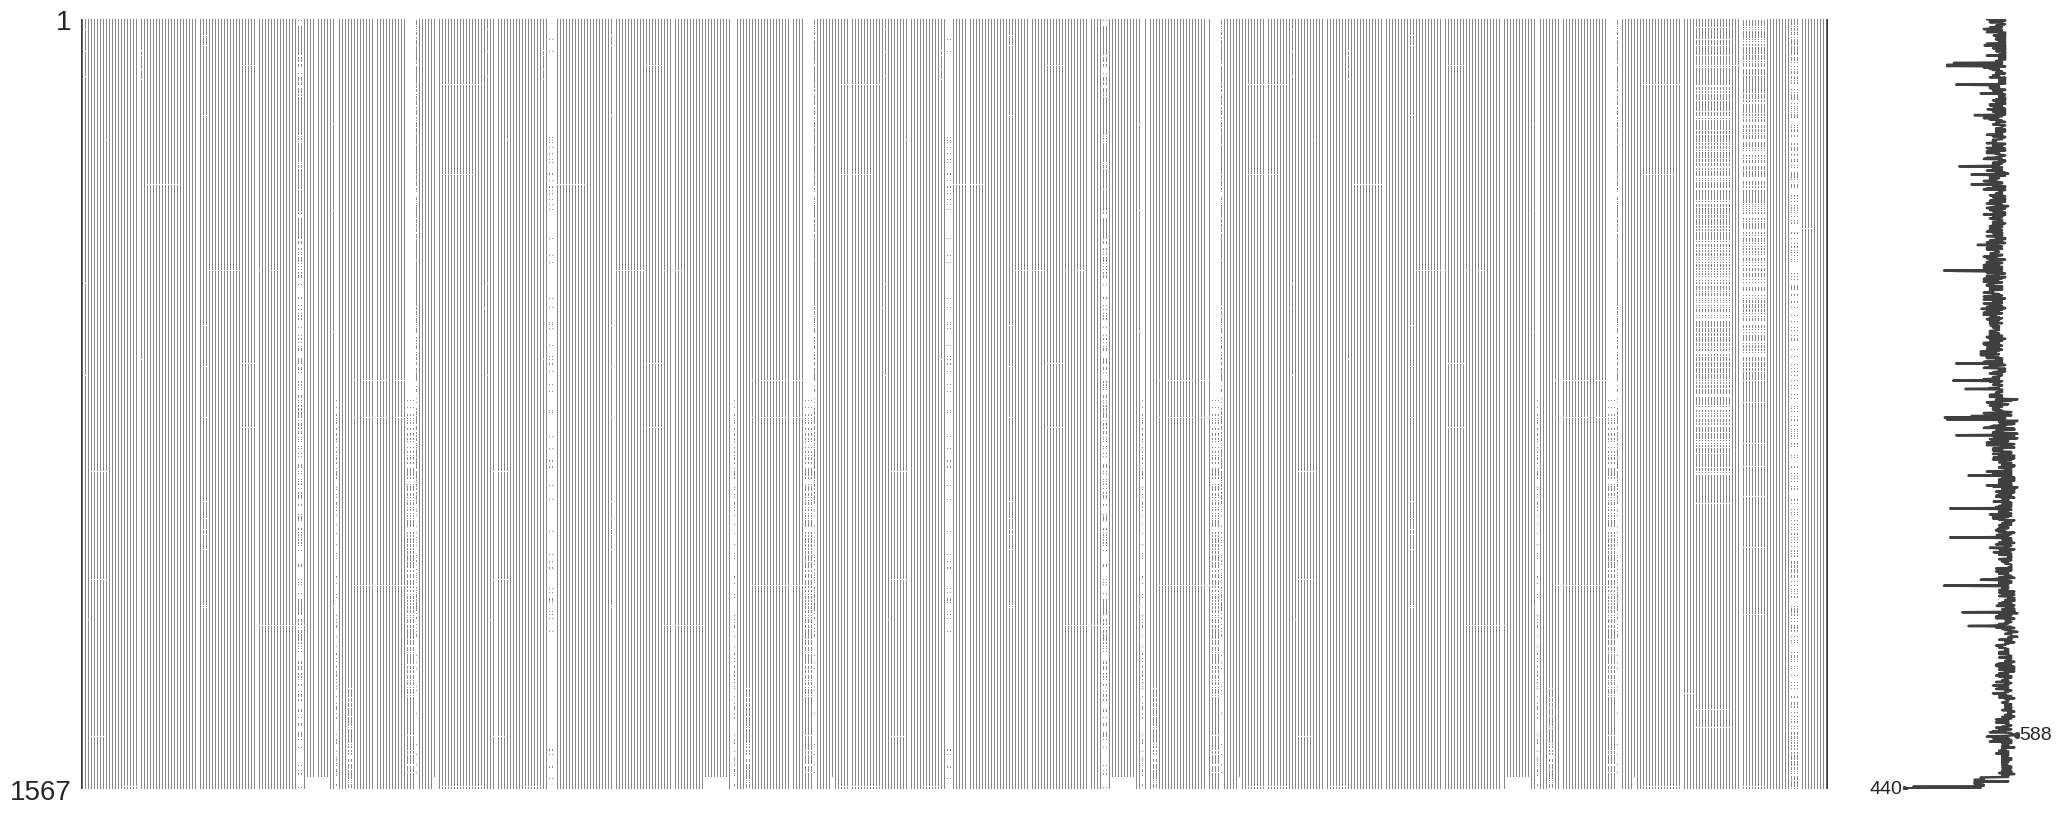

In [ ]:
msno.matrix(uci_secom);

In [ ]:
uci_secom.isnull().sum().sum()

41951

In [ ]:
uci_secom.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.4900,3056.6500,3356.3500
1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.4050,2538.8225,2846.4400
2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.0667,2218.0555,2315.2667
3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.2144,1591.2235,3715.0417
4,1553.0,4.197013,56.355540,0.6815,1.017700,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
587,1566.0,0.016475,0.008808,0.0032,0.010600,0.0148,0.0203,0.0799
588,1566.0,0.005283,0.002867,0.0010,0.003300,0.0046,0.0064,0.0286
589,1566.0,99.670066,93.891919,0.0000,44.368600,71.9005,114.7497,737.3048


In [ ]:
uci_secom.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [ ]:
uci_secom.dtypes.value_counts()

float64    590
object       1
int64        1
dtype: int64

In [ ]:
uci_secom.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

In [ ]:
uci_secom.dtypes['Pass/Fail']

dtype('int64')

In [ ]:
Counter(uci_secom['Pass/Fail'])

Counter({-1: 1463, 1: 104})

In [ ]:
uci_secom.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [ ]:
uci_secom['year'] = pd.DatetimeIndex(uci_secom['Time']).year
uci_secom['month'] = pd.DatetimeIndex(uci_secom['Time']).month
uci_secom['date'] = pd.DatetimeIndex(uci_secom['Time']).day
uci_secom['week_day'] = pd.DatetimeIndex(uci_secom['Time']).weekday
uci_secom['start_time'] = pd.DatetimeIndex(uci_secom['Time']).time
uci_secom['hour'] = pd.DatetimeIndex(uci_secom['Time']).hour
uci_secom['min'] = pd.DatetimeIndex(uci_secom['Time']).minute
uci_secom=uci_secom.drop('Time',axis=1)

In [ ]:
uci_secom.head()

,0,1,2,3,4,5,6,7,8,9,...,588,589,Pass/Fail,year,month,date,week_day,start_time,hour,min
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,-1,2008,7,19,5,11:55:00,11,55
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,-1,2008,7,19,5,12:32:00,12,32
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,1,2008,7,19,5,13:17:00,13,17
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,-1,2008,7,19,5,14:43:00,14,43
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0044,73.8432,-1,2008,7,19,5,15:22:00,15,22


In [ ]:
#uci_secom['start_time'] = pd.DatetimeIndex(uci_secom['Time']).time
uci_secom=uci_secom.drop('start_time',axis=1)

In [ ]:
uci_secom.head()

,0,1,2,3,4,5,6,7,8,9,...,587,588,589,Pass/Fail,year,month,date,week_day,hour,min
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,NaN,-1,2008,7,19,5,11,55
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0201,0.0060,208.2045,-1,2008,7,19,5,12,32
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0484,0.0148,82.8602,1,2008,7,19,5,13,17
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0149,0.0044,73.8432,-1,2008,7,19,5,14,43
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0149,0.0044,73.8432,-1,2008,7,19,5,15,22


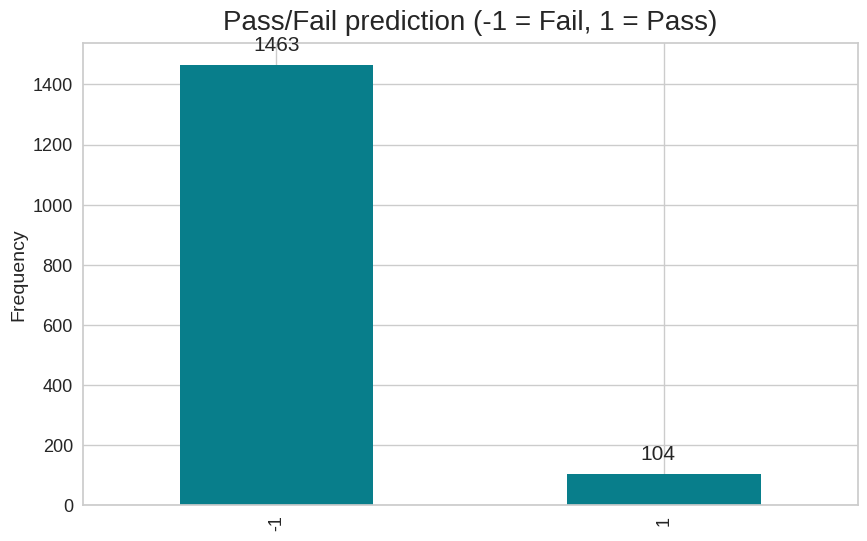

In [ ]:
ax = uci_secom['Pass/Fail'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Pass/Fail prediction (-1 = Fail, 1 = Pass)', size=20, pad=10)
ax.set_ylabel('Frequency', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 50, str(round(i.get_height(), 2)), fontsize=15)

In [ ]:
uci_secom = uci_secom.fillna(0)

In [ ]:
uci_secom.head()

,0,1,2,3,4,5,6,7,8,9,...,587,588,589,Pass/Fail,year,month,date,week_day,hour,min
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0000,0.0000,0.0000,-1,2008,7,19,5,11,55
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0201,0.0060,208.2045,-1,2008,7,19,5,12,32
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0484,0.0148,82.8602,1,2008,7,19,5,13,17
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0149,0.0044,73.8432,-1,2008,7,19,5,14,43
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0149,0.0044,73.8432,-1,2008,7,19,5,15,22


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

x = uci_secom

X, Y = sm.fit_resample(uci_secom.drop("Pass/Fail",axis=1), uci_secom["Pass/Fail"])

print(f'''Shape of X before SMOTE: {x.shape}
Shape of X after SMOTE: {X.shape}''')

print('\nBalance of positive and negative classes (%):')
Y.value_counts(normalize=True) * 100

Shape of X before SMOTE: (1567, 597)
Shape of X after SMOTE: (2926, 596)

Balance of positive and negative classes (%):


-1    50.0
 1    50.0
Name: Pass/Fail, dtype: float64

In [ ]:
len(X)

2926

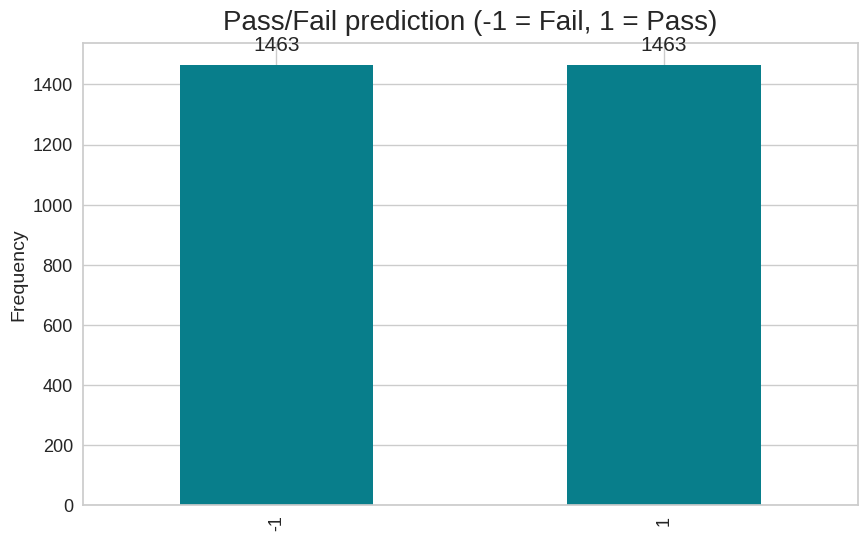

In [ ]:
ax = Y.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Pass/Fail prediction (-1 = Fail, 1 = Pass)', size=20, pad=10)
ax.set_ylabel('Frequency', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 50, str(round(i.get_height(), 2)), fontsize=15)

SVM SMOTE

In [ ]:
from imblearn.over_sampling import SVMSMOTE

svsm = SVMSMOTE(random_state=123)

x = uci_secom

X, Y = svsm.fit_resample(uci_secom.drop("Pass/Fail",axis=1), uci_secom["Pass/Fail"])

print(f'''Shape of X before SVM SMOTE: {x.shape}
Shape of X after SVM SMOTE: {X.shape}''')

print('\nBalance of positive and negative classes (%):')
Y.value_counts(normalize=True) * 100

Shape of X before SVM SMOTE: (1567, 597)
Shape of X after SVM SMOTE: (2025, 596)

Balance of positive and negative classes (%):


-1    72.246914
 1    27.753086
Name: Pass/Fail, dtype: float64

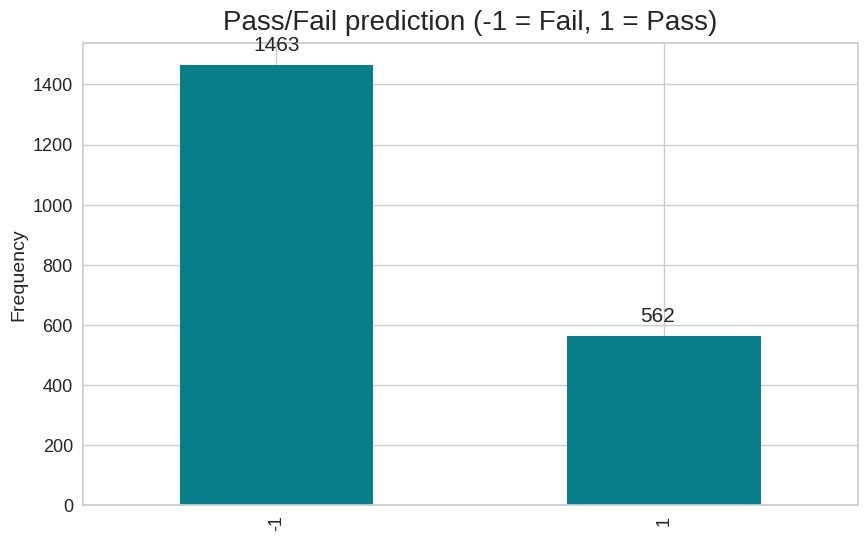

In [ ]:
ax = Y.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Pass/Fail prediction (-1 = Fail, 1 = Pass)', size=20, pad=10)
ax.set_ylabel('Frequency', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 50, str(round(i.get_height(), 2)), fontsize=15)

ROS

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ROS = RandomOverSampler(random_state=0)

x = uci_secom

X, Y = ROS.fit_resample(uci_secom.drop("Pass/Fail",axis=1), uci_secom["Pass/Fail"])

print(f'''Shape of X before SMOTE: {x.shape}
Shape of X after SMOTE: {X.shape}''')

print('\nBalance of positive and negative classes (%):')
Y.value_counts(normalize=True) * 100

Shape of X before SMOTE: (1567, 597)
Shape of X after SMOTE: (2926, 596)

Balance of positive and negative classes (%):


-1    50.0
 1    50.0
Name: Pass/Fail, dtype: float64

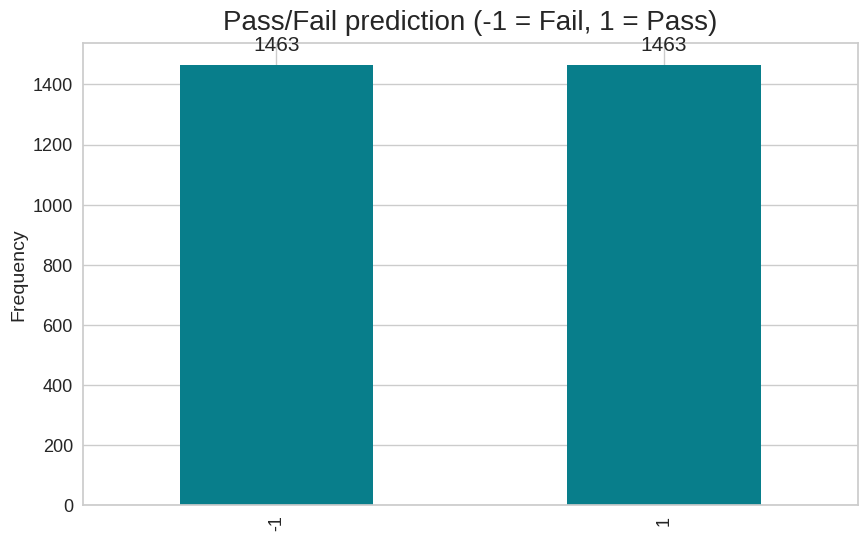

In [ ]:
ax = Y.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Pass/Fail prediction (-1 = Fail, 1 = Pass)', size=20, pad=10)
ax.set_ylabel('Frequency', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 50, str(round(i.get_height(), 2)), fontsize=15)

BLS

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

BLS = BorderlineSMOTE(random_state=0)

x = uci_secom

X, Y = BLS.fit_resample(uci_secom.drop("Pass/Fail",axis=1), uci_secom["Pass/Fail"])

print(f'''Shape of X before SMOTE: {x.shape}
Shape of X after SMOTE: {X.shape}''')

print('\nBalance of positive and negative classes (%):')
Y.value_counts(normalize=True) * 100

Shape of X before SMOTE: (1567, 597)
Shape of X after SMOTE: (2926, 596)

Balance of positive and negative classes (%):


-1    50.0
 1    50.0
Name: Pass/Fail, dtype: float64

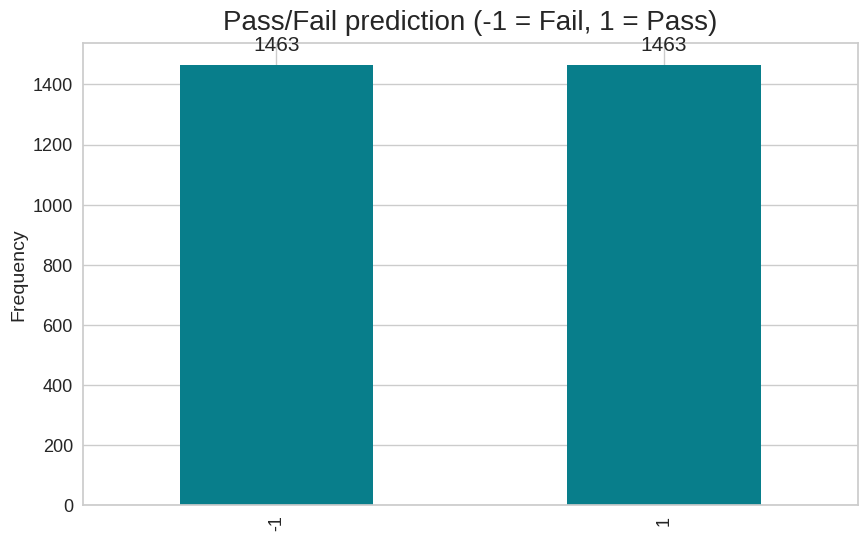

In [ ]:
ax = Y.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Pass/Fail prediction (-1 = Fail, 1 = Pass)', size=20, pad=10)
ax.set_ylabel('Frequency', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 50, str(round(i.get_height(), 2)), fontsize=15)

Randomundersampler

In [ ]:
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

# Create the random undersampler object
rus = RandomUnderSampler(random_state=42)

# Resample the data
X, Y = rus.fit_resample(uci_secom.drop("Pass/Fail",axis=1), uci_secom["Pass/Fail"])
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X.shape}''')

print('\nBalance of positive and negative classes (%):')
Y.value_counts(normalize=True) * 100

Shape of X before SMOTE: (208, 596)
Shape of X after SMOTE: (208, 596)

Balance of positive and negative classes (%):


-1    50.0
 1    50.0
Name: Pass/Fail, dtype: float64

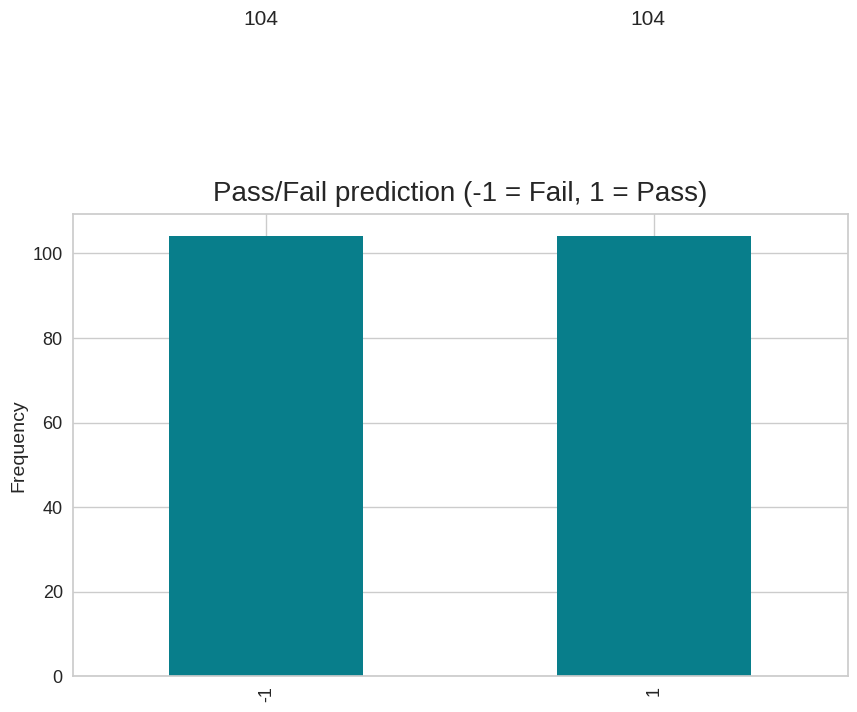

In [ ]:
ax = Y.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Pass/Fail prediction (-1 = Fail, 1 = Pass)', size=20, pad=10)
ax.set_ylabel('Frequency', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 50, str(round(i.get_height(), 2)), fontsize=15)

In [ ]:
uci_secom.head()

,0,1,2,3,4,5,6,7,8,9,...,587,588,589,Pass/Fail,year,month,date,week_day,hour,min
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0000,0.0000,0.0000,-1,2008,7,19,5,11,55
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0201,0.0060,208.2045,-1,2008,7,19,5,12,32
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0484,0.0148,82.8602,1,2008,7,19,5,13,17
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0149,0.0044,73.8432,-1,2008,7,19,5,14,43
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0149,0.0044,73.8432,-1,2008,7,19,5,15,22


In [ ]:
uci_secom.year.unique()

array([2008])

In [ ]:
uci_secom.month.unique()

array([ 7,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12])

In [ ]:
uci_secom.date.unique()

array([19, 20, 21, 22, 23, 25, 27, 28, 29, 30, 31,  8, 13, 15, 16, 17, 18,
       24,  9, 14, 26, 10])

In [ ]:
uci_secom.week_day.unique()

array([5, 6, 0, 1, 2, 4, 3])

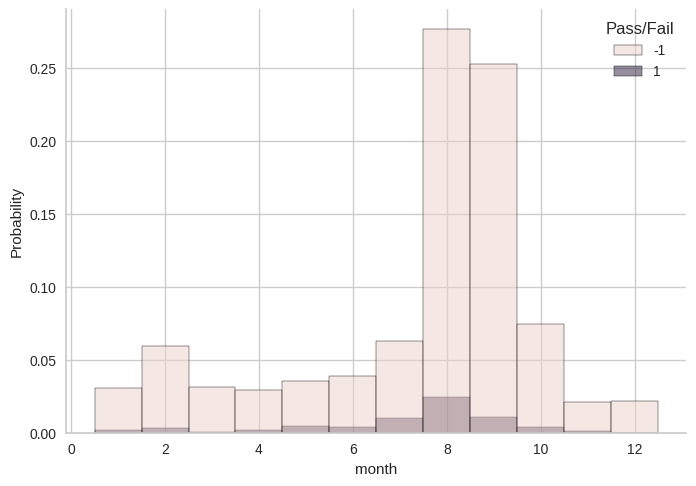

In [ ]:
sns.histplot(data=uci_secom, x="month", hue="Pass/Fail",stat="probability", discrete=True,);
sns.despine(right=True,top=True)

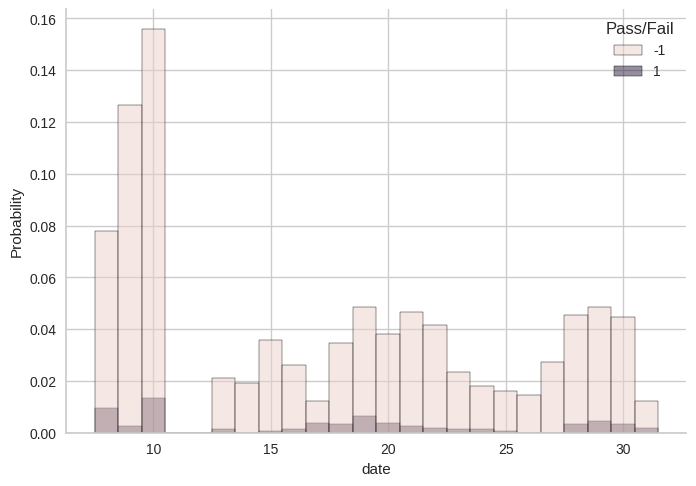

In [ ]:
sns.histplot(data=uci_secom, x="date", hue="Pass/Fail",stat="probability", discrete=True,);
sns.despine(right=True,top=True)

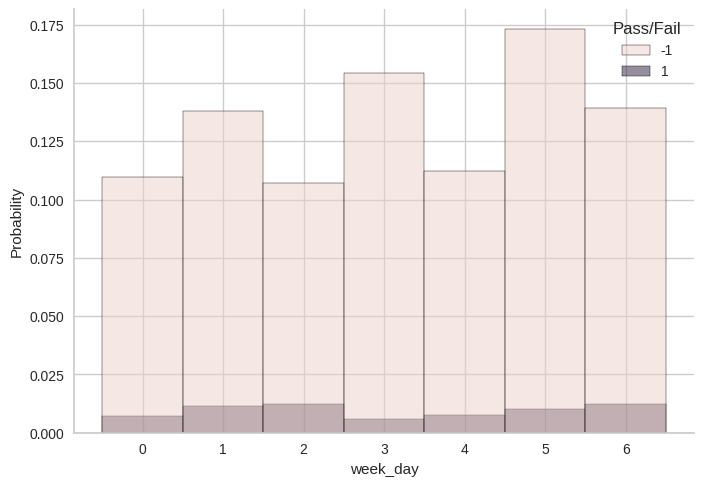

In [ ]:
sns.histplot(data=uci_secom, x="week_day", hue="Pass/Fail",stat="probability", discrete=True,);
sns.despine(right=True,top=True)

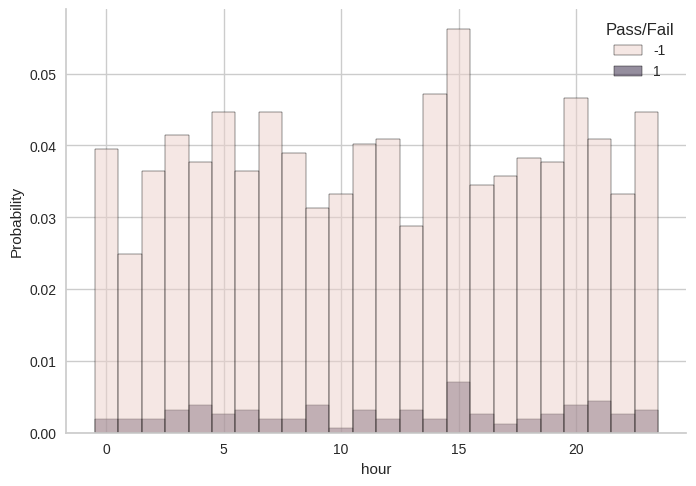

In [ ]:
sns.histplot(data=uci_secom, x="hour", hue="Pass/Fail",stat="probability", discrete=True,);
sns.despine(right=True,top=True)

In [ ]:
uni_target = uci_secom[['Pass/Fail']]
uni_data = uci_secom.drop(['Pass/Fail'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(uni_data, uni_target, test_size=0.25, random_state=42, stratify=uni_target)

In [ ]:

X_train = pd.DataFrame(X_train, columns=uni_data.columns)
X_test = pd.DataFrame(X_test, columns=uni_data.columns)
y_train = pd.DataFrame(y_train, columns=uni_target.columns)
y_test = pd.DataFrame(y_test, columns=uni_target.columns)

In [ ]:
y_train = y_train.replace(to_replace=[-1, 1], value=[1, 0])
y_test = y_test.replace(to_replace=[-1, 1], value=[1, 0])

In [ ]:
type_dct = {str(k): len(list(v)) for k, v in X_train.groupby(X_train.dtypes, axis=1)}
type_dct

{'int64': 6, 'float64': 590}

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,586,587,588,589,year,month,date,week_day,hour,min
160,3057.03,2468.41,2184.8778,960.8486,1.0160,100.0,102.5333,0.1214,1.4549,-0.0125,...,0.0195,0.0121,0.0048,62.1248,2008,8,8,4,21,22
814,3012.09,2551.08,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5136,-0.0090,...,0.0111,0.0069,0.0021,62.3602,2008,12,9,1,20,28
124,3032.81,2534.74,2239.4223,1997.3782,1.5397,100.0,98.3356,0.1229,1.4974,-0.0046,...,0.0241,0.0086,0.0027,35.5550,2008,5,8,3,21,22
501,2987.72,2550.52,2180.7000,1159.3838,1.0177,100.0,98.9367,0.1222,1.4207,0.0016,...,0.0048,0.0226,0.0079,474.0812,2008,8,29,4,0,49
1362,3001.90,2465.51,2223.0444,1194.5986,1.2016,100.0,112.5811,0.1229,1.4201,-0.0182,...,0.0182,0.0077,0.0025,42.5048,2008,6,10,1,13,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,3185.69,2537.68,2173.2778,1116.2950,0.8525,100.0,103.8200,0.1237,1.4653,-0.0204,...,0.0230,0.0095,0.0028,41.2178,2008,2,10,6,17,19
365,2988.92,2460.91,2178.0778,941.9524,0.8039,100.0,104.0167,0.1229,1.5829,-0.0278,...,0.0291,0.0135,0.0045,46.4165,2008,8,21,3,15,32
1420,2975.74,2517.35,2162.5556,1041.0369,1.4305,100.0,100.4111,0.1238,1.4968,-0.0201,...,0.0299,0.0071,0.0020,23.6431,2008,8,10,6,10,37
113,2928.16,2523.21,2210.6111,1184.6481,1.2577,100.0,102.9356,0.1201,1.4453,-0.0126,...,0.0049,0.0144,0.0047,293.2614,2008,5,8,3,6,21


In [ ]:
X_train_notime = X_train.drop(['year','month','date','week_day','hour','min'], axis=1)
X_test_notime = X_test.drop(['year','month','date','week_day','hour','min'], axis=1)

In [ ]:
np.count_nonzero(X_train_notime.isna().sum())

0

In [ ]:
X_train_notime.isna().sum().sort_values(ascending=False).head(10)

0      0
405    0
389    0
390    0
391    0
392    0
393    0
394    0
395    0
396    0
dtype: int64

In [ ]:
def evaluate(train_df, test_df, train_target, test_target):

    # first, we should scale our data so logistic regression works better
    scaler = StandardScaler()
    scaler.fit(train_df)
    train_std = pd.DataFrame(scaler.transform(train_df), columns=train_df.columns)
    test_std = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)

    # training the model
    logreg = RandomForestClassifier()
    start_time = datetime.datetime.now()
    logreg.fit(train_std, train_target.values.ravel())
    elapsed = datetime.datetime.now() - start_time
    time = int(elapsed.total_seconds()*1000)


    # evaluation and scoring
    y_pred = logreg.predict(test_std)
    y_true = test_target.values.ravel()
    f1score = f1_score(y_true, y_pred, average='micro')
    mccscore=matthews_corrcoef(y_true, y_pred)




    return time, f1score, mccscore

In [ ]:
# impute missing values and save it as a temporary dataset.
imputer = KNNImputer()
imputer.fit(X_train_notime)
imputed_train = pd.DataFrame(imputer.transform(X_train_notime), columns = X_train_notime.columns)
imputed_test = pd.DataFrame(imputer.transform(X_test_notime), columns = X_test_notime.columns)

# lists to record time and scores
f1scores = []
mccscores = []
times = []

time, f1score, mccscore = evaluate(train_df = imputed_train, test_df = imputed_test, train_target=y_train, test_target=y_test)
print(f' Training time: {time}ms\n F1 Score: {f1score}\n MCC Score: {mccscore}')
f1scores.append(f1score)
mccscores.append(mccscore)
times.append(time)

 Training time: 2893ms
 F1 Score: 0.9336734693877551
 MCC Score: 0.0


In [ ]:
def percentna(dataframe, threshold):
    columns = dataframe.columns[(dataframe.isna().sum()/dataframe.shape[1])>threshold]
    return columns.tolist()

In [ ]:
na_columns = percentna(X_train, 0.25)
X_train_nona = X_train_notime.drop(na_columns, axis=1)
X_test_nona = X_test_notime.drop(na_columns, axis=1)
n_features1 = X_train_nona.shape[1]
print(f'After removing {len(na_columns)} features, there are {n_features1} features left.')

After removing 0 features, there are 590 features left.


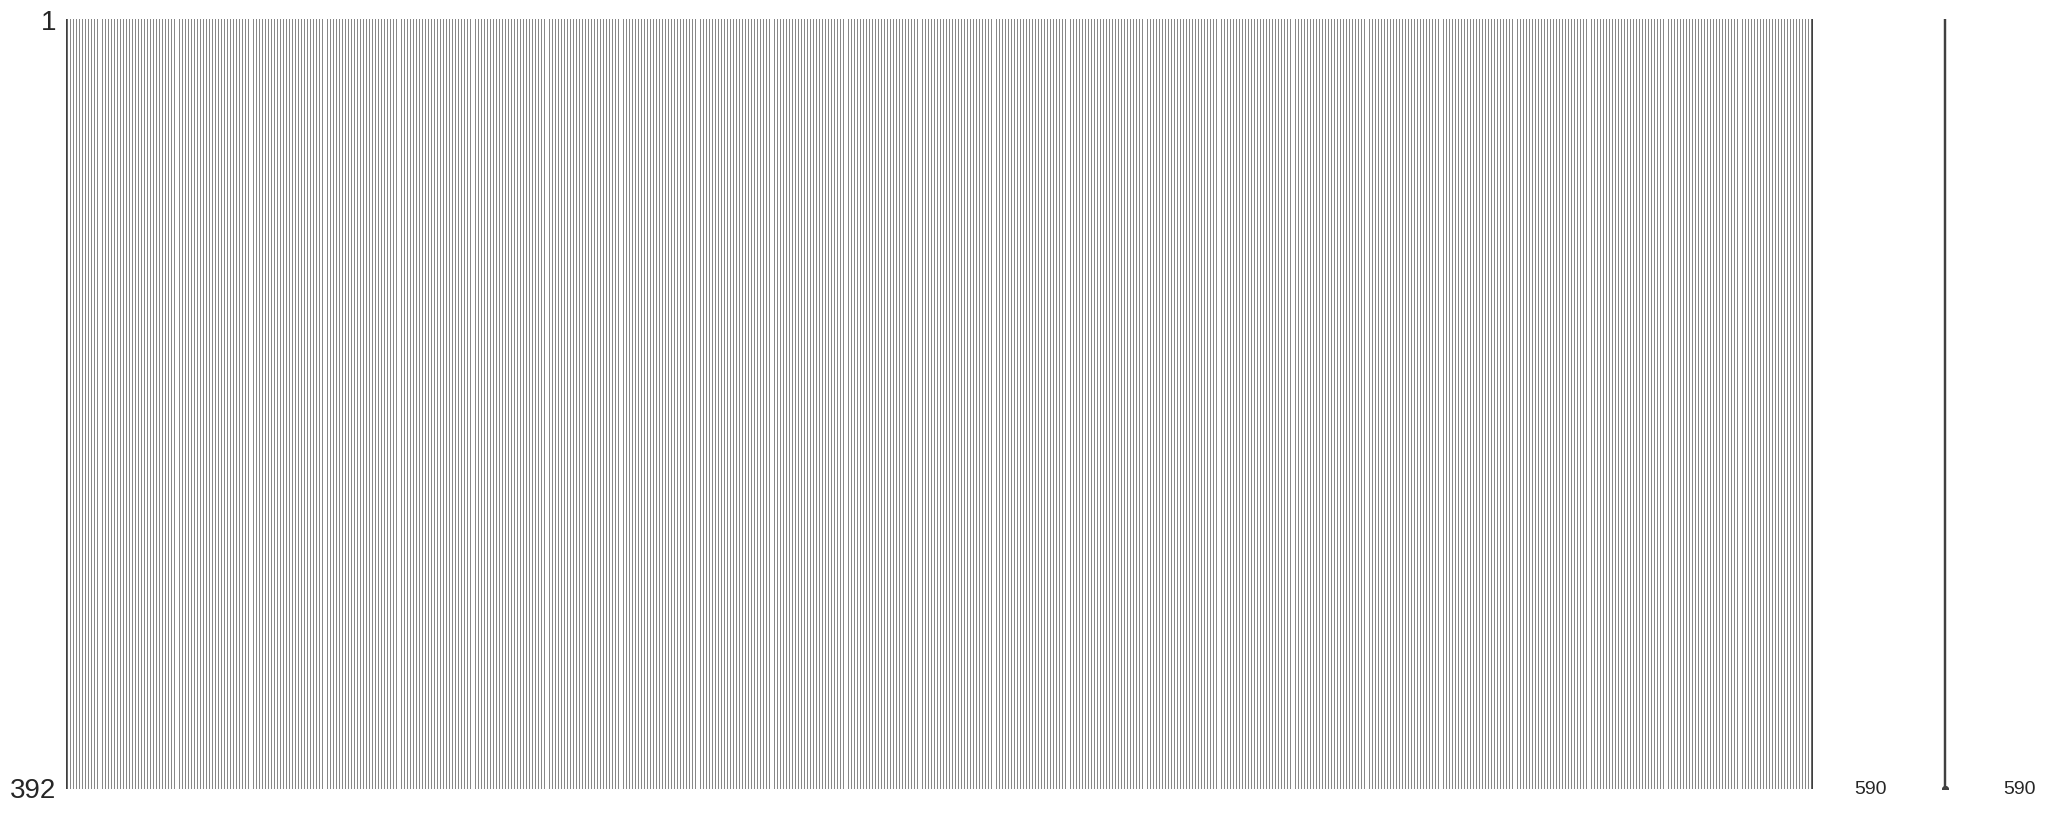

In [ ]:
msno.matrix(X_test_nona);

In [ ]:
imputer = KNNImputer()
imputer.fit(X_train_nona)

KNNImputer()

In [ ]:
X_train_imp = pd.DataFrame(imputer.transform(X_train_nona), columns = X_train_nona.columns)
X_test_imp = pd.DataFrame(imputer.transform(X_test_nona), columns = X_test_nona.columns)

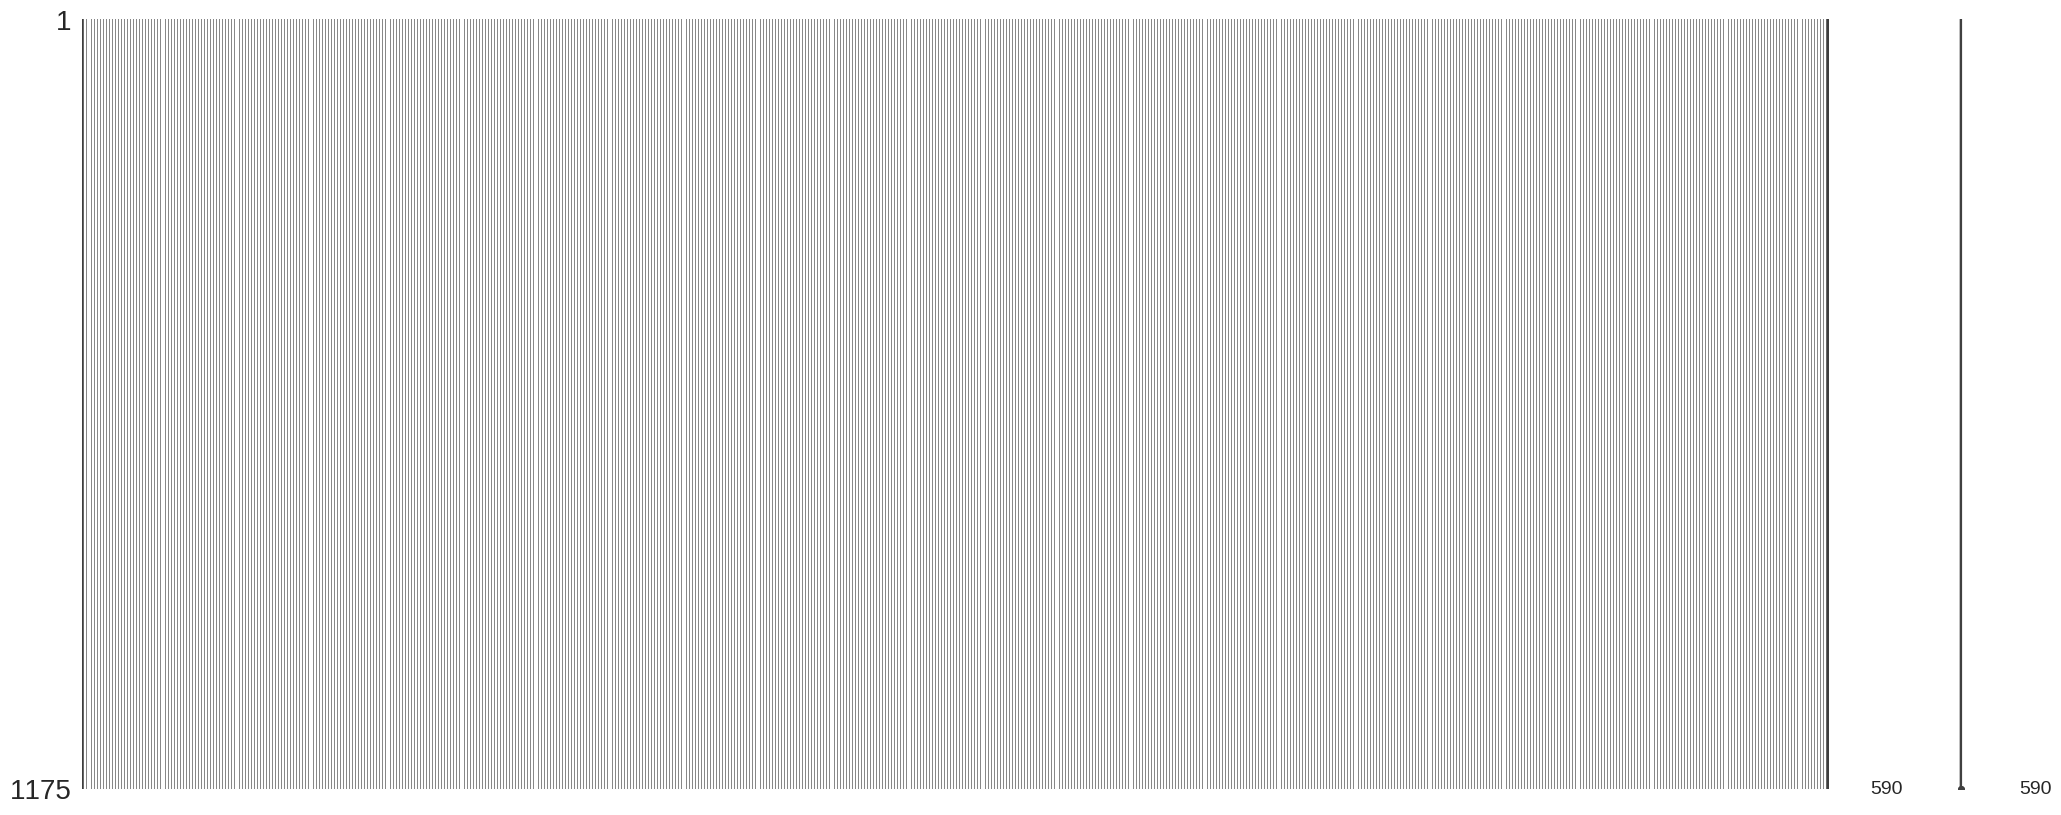

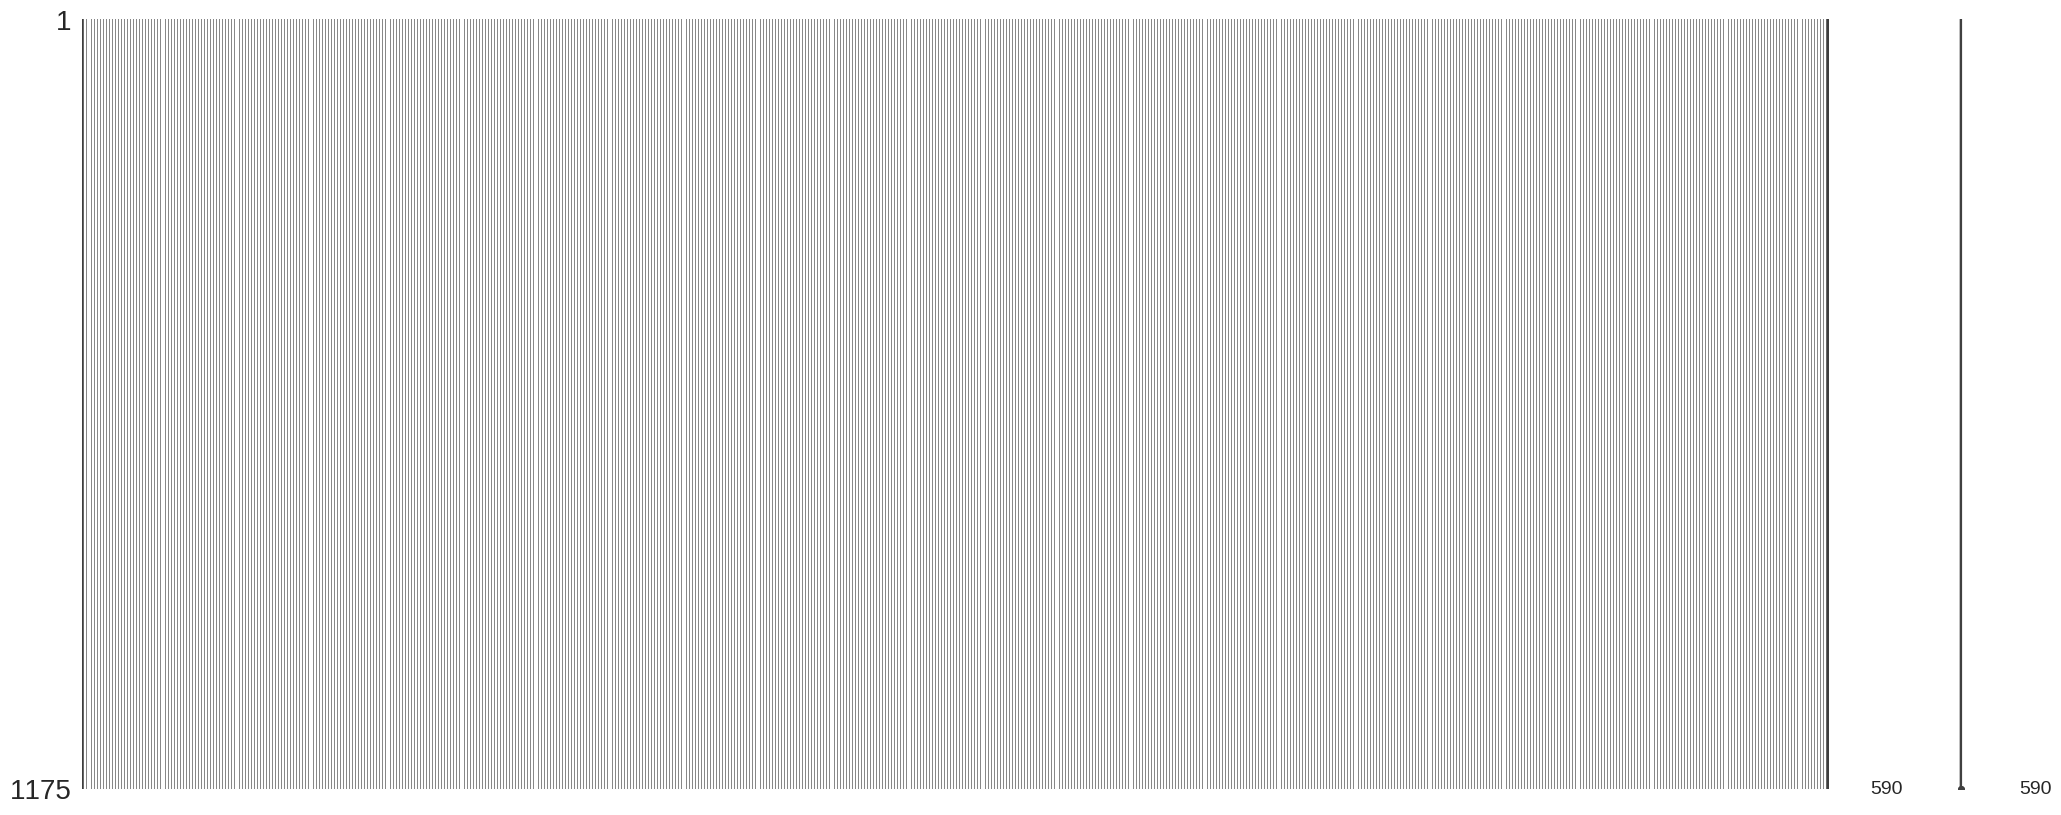

In [ ]:
msno.matrix(X_train_imp);
msno.matrix(X_train_imp);

In [ ]:
time, f1score, mccscore = evaluate(train_df = X_train_imp, test_df = X_test_imp, train_target=y_train, test_target=y_test)
print(f' Training time: {time}ms\n F1 Score: {f1score}\n MCC Score: {mccscore}')
f1scores.append(f1score)
mccscores.append(mccscore)
times.append(time)

 Training time: 2511ms
 F1 Score: 0.9336734693877551
 MCC Score: 0.0


In [ ]:
normalizer = Normalizer()
normalizer.fit(X_train_imp)

Normalizer()

In [ ]:
X_train_nrm = pd.DataFrame(normalizer.transform(X_train_imp), columns = X_train_imp.columns)
X_test_nrm = pd.DataFrame(normalizer.transform(X_test_imp), columns = X_test_imp.columns)

In [ ]:
selector = VarianceThreshold()
selector.fit(X_train_nrm)

VarianceThreshold()

In [ ]:
mask = selector.get_support()
columns = X_train_nrm.columns
selected_cols = columns[mask]
n_features2 = len(selected_cols)
print(f'remaining features: {n_features2}')

remaining features: 478


In [ ]:
X_train_var = pd.DataFrame(selector.transform(X_train_imp), columns = selected_cols)
X_test_var = pd.DataFrame(selector.transform(X_test_imp), columns = selected_cols)

In [ ]:
time, f1score, mccscore = evaluate(train_df = X_train_var, test_df = X_test_var, train_target=y_train, test_target=y_test)
print(f' Training time: {time}ms\n F1 Score: {f1score}\n MCC Score: {mccscore}')
f1scores.append(f1score)
mccscores.append(mccscore)
times.append(time)

 Training time: 2640ms
 F1 Score: 0.9336734693877551
 MCC Score: 0.0


In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train_var, 0.95)
X_train_corr = X_train_var.drop(corr_features, axis=1)
X_test_corr = X_test_var.drop(corr_features, axis=1)
n_features3 = X_train_corr.shape[1]
print(f'After removing {len(corr_features)} features, there are {n_features3} features left.')

After removing 214 features, there are 264 features left.


In [ ]:
time, f1score, mccscore = evaluate(train_df = X_train_corr, test_df = X_test_corr, train_target=y_train, test_target=y_test)
print(f' Training time: {time}ms\n F1 Score: {f1score}\n MCC Score: {mccscore}')
f1scores.append(f1score)
mccscores.append(mccscore)
times.append(time)

 Training time: 2506ms
 F1 Score: 0.9336734693877551
 MCC Score: 0.0


In [ ]:
def corrwith_target(dataframe, target, threshold):
    cor = dataframe.corr()
    #Correlation with output variable
    cor_target = abs(cor[target])
    #Selecting non correlated features
    relevant_features = cor_target[cor_target<threshold]
    return relevant_features.index.tolist()[:-1]

In [ ]:
# in order to find the correlation with target, I have to add target as a column to X_train_corr
dummy_train = X_train_corr.copy()
dummy_train['target'] = y_train

In [ ]:
corrwith_cols = corrwith_target(dummy_train, 'target', 0.05)
X_train_corw = X_train_corr.drop(corrwith_cols, axis=1)
X_test_corw = X_test_corr.drop(corrwith_cols, axis=1)
n_features4 = X_train_corw.shape[1]
print(f'After removing {len(corrwith_cols)} features, there are {n_features4} features left.')

After removing 224 features, there are 40 features left.


In [ ]:
time, f1score, mccscore = evaluate(train_df = X_train_corw, test_df = X_test_corw, train_target=y_train, test_target=y_test)
print(f' Training time: {time}ms\n F1 Score: {f1score}\n MCC Score: {mccscore}')
f1scores.append(f1score)
mccscores.append(mccscore)
times.append(time)

 Training time: 863ms
 F1 Score: 0.9336734693877551
 MCC Score: 0.0


In [ ]:
from scipy import stats

def outliers_high(feat):
    q1= feat.quantile(.25)
    q2= feat.quantile(.5)
    q3= feat.quantile(.75)
    feat = np.where(feat > q3+ stats.iqr(feat),q2,feat)
    return feat

def outliers_low(feat):
    q1= feat.quantile(.25)
    q2= feat.quantile(.5)
    q3= feat.quantile(.75)
    feat = np.where(feat < q1 - stats.iqr(feat),q2,feat)
    return feat

In [ ]:
X_train_corw

,20,42,43,46,51,62,63,67,99,100,...,476,487,489,562,563,564,565,583,587,589
0,1.3864,70.0,350.5018,733.5702,224.2298,114.8573,16.1127,1.0223,0.0056,-0.0001,...,47.9589,106.9136,509.0164,257.318,0.6740,3.29,0.1632,0.0126,0.0121,62.1248
1,1.4087,70.0,357.5045,728.1839,119.6453,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,35.8040,155.2124,261.810,0.7251,7.48,0.1112,0.0073,0.0069,62.3602
2,1.4055,70.0,361.9427,745.7312,195.2785,129.0582,8.7877,1.0232,0.0381,-0.0001,...,37.4184,771.3626,170.7463,263.738,0.6633,4.52,0.1494,0.0149,0.0086,35.5550
3,1.4070,70.0,350.7564,729.2869,199.6725,118.5455,13.0755,1.0917,0.0009,0.0000,...,14.3833,67.6095,507.7364,269.118,0.6418,8.94,0.1539,0.0099,0.0226,474.0812
4,1.4312,70.0,347.7727,738.7064,73.7388,127.7600,4.5836,0.8442,0.0140,-0.0005,...,14.2953,918.9504,146.4452,251.880,0.9001,9.43,0.1931,0.0085,0.0077,42.5048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,1.3985,70.0,353.7491,745.2585,151.6885,122.4673,13.4927,0.8396,-0.0688,0.0004,...,7.1967,291.9852,154.6846,264.272,0.5671,4.98,0.0877,0.0104,0.0095,41.2178
1171,1.3976,70.0,355.8500,732.3170,120.3915,119.3100,9.9493,1.0249,0.0000,0.0000,...,14.8925,79.9238,136.8263,264.272,0.5671,4.98,0.0877,0.0148,0.0135,46.4165
1172,1.3863,70.0,345.6836,730.0720,217.0850,119.1591,12.6218,0.9321,-0.0149,0.0003,...,23.0732,420.3562,98.8593,264.272,0.5671,4.98,0.0877,0.0115,0.0071,23.6431
1173,1.3922,70.0,365.2182,738.7691,136.6066,112.8691,16.6345,1.0258,0.0028,0.0000,...,10.1527,80.0697,82.2571,0.000,0.0000,0.00,0.0000,0.0160,0.0144,293.2614


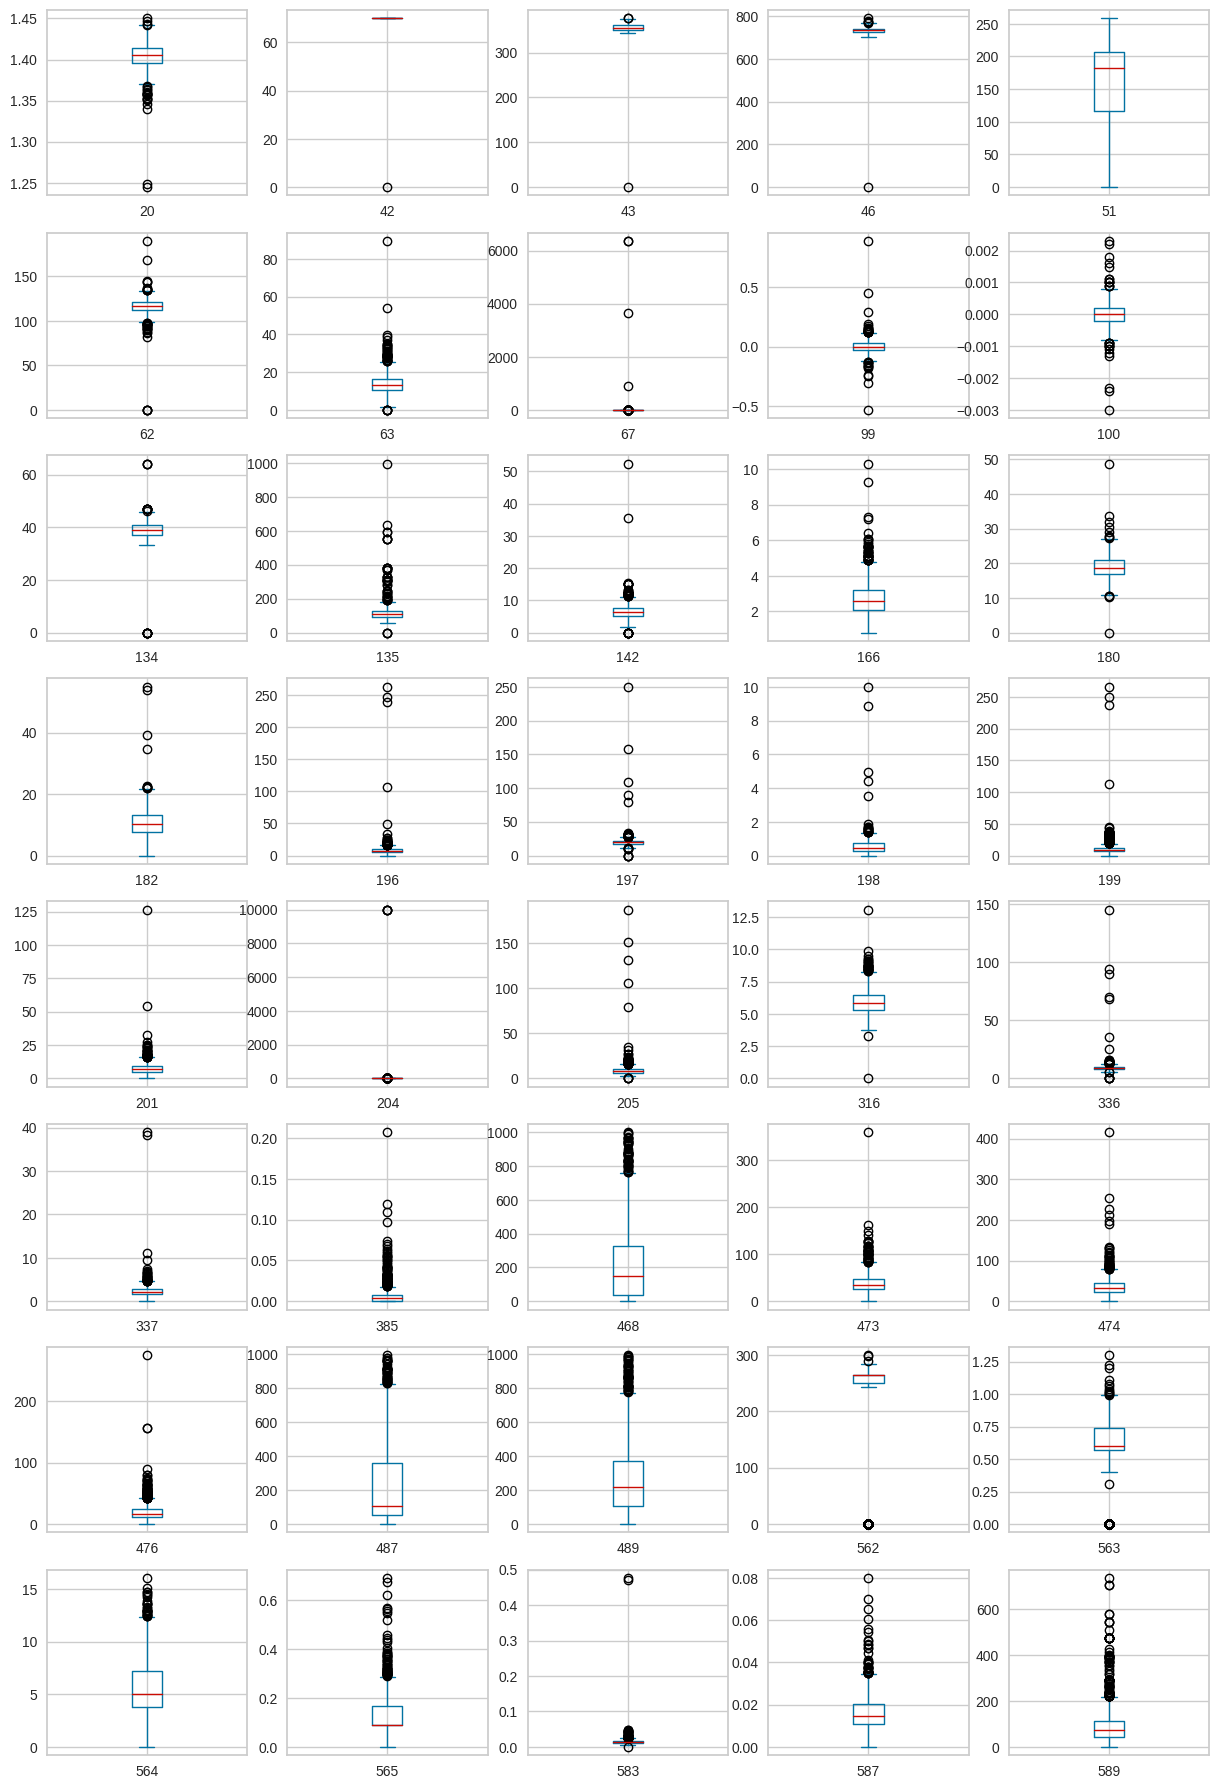

In [ ]:
X_train_corw.plot(kind='box', subplots=True,layout=(52,5), fontsize=10, figsize=(15,150));

In [ ]:
X_train_outlayer=X_train_corw.copy()
for column in X_train_corw:
    X_train_outlayer[column] = outliers_high(X_train_outlayer[column])
    X_train_outlayer[column] = outliers_low(X_train_outlayer[column])

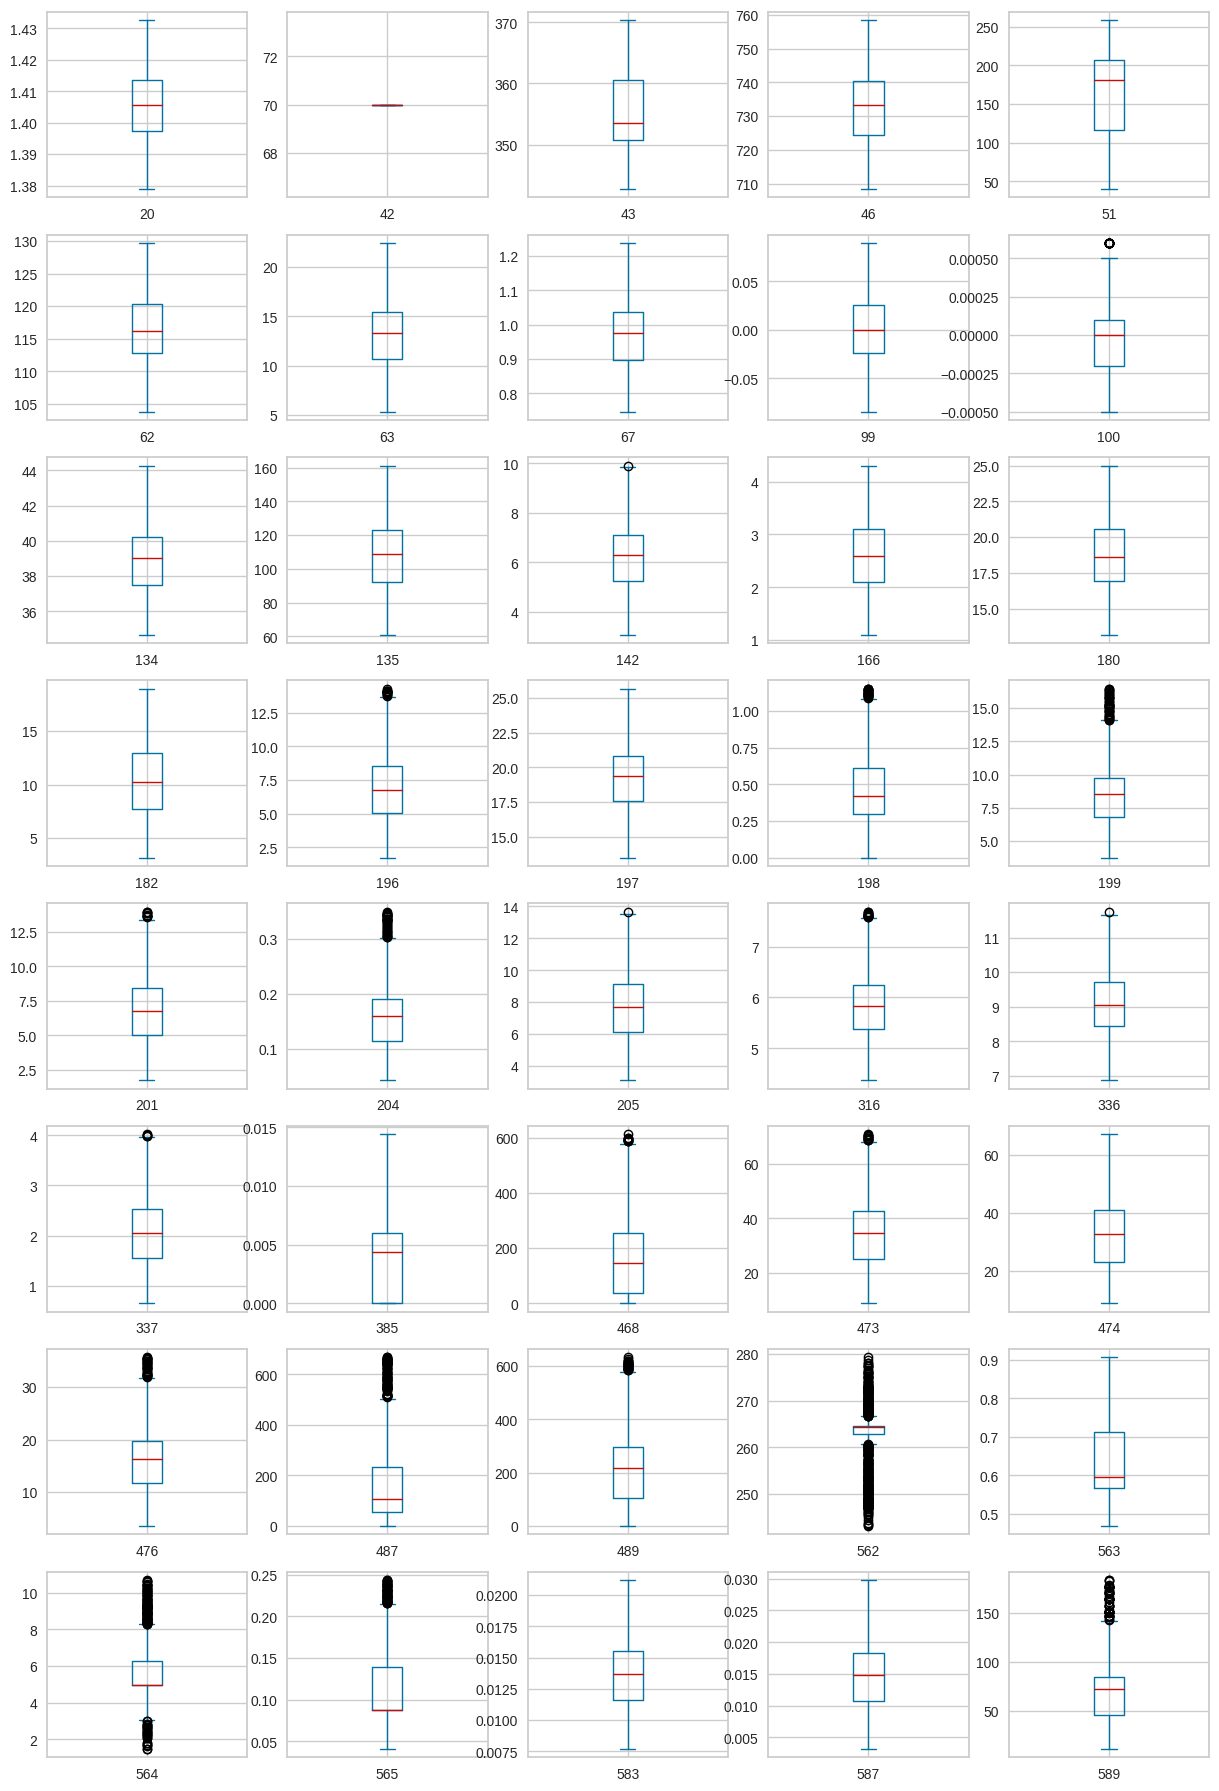

In [ ]:
X_train_outlayer.plot(kind='box', subplots=True,layout=(52,5), fontsize=10, figsize=(15,150));

In [ ]:
X_test_outlayer=X_test_corw.copy()
for column in X_test_corw:
    X_test_outlayer[column] = outliers_high(X_test_outlayer[column])
    X_test_outlayer[column] = outliers_low(X_test_outlayer[column])

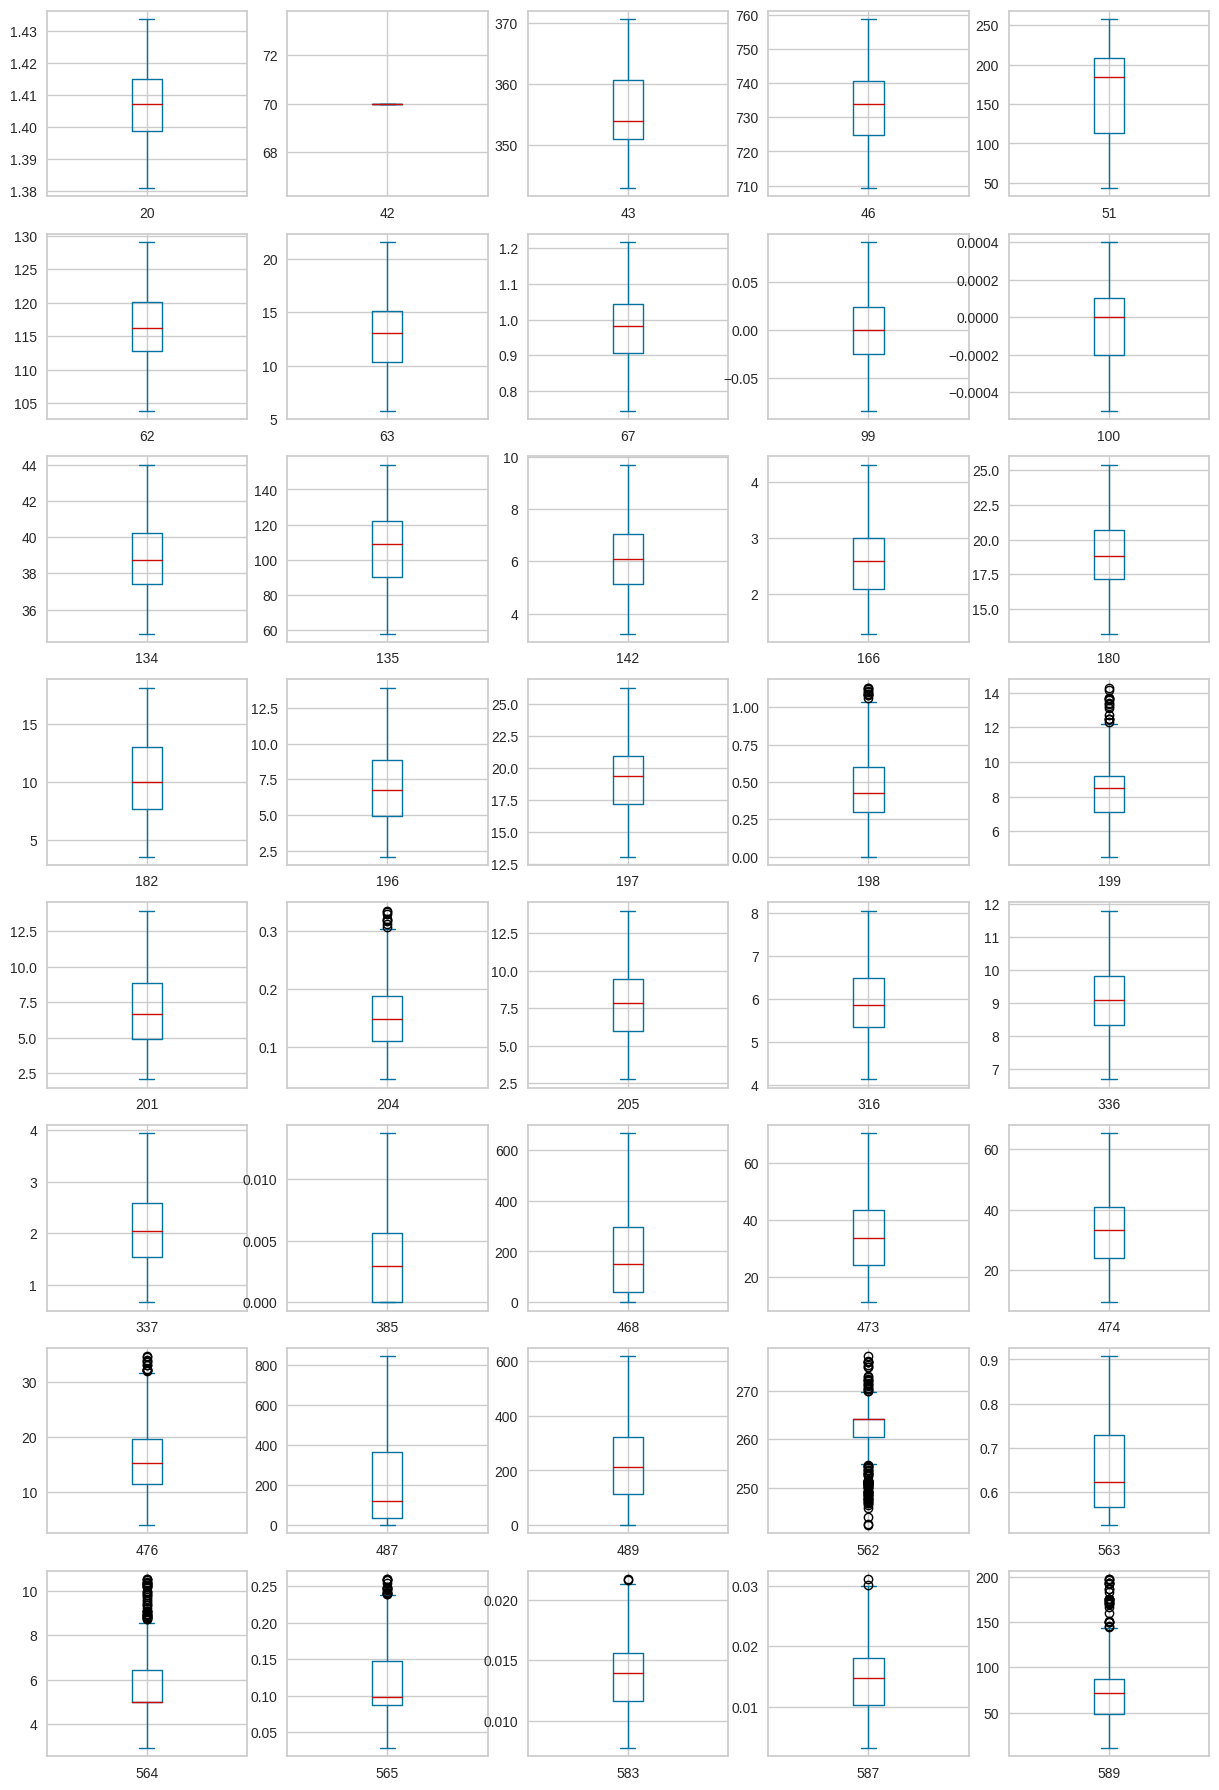

In [ ]:
X_test_outlayer.plot(kind='box', subplots=True,layout=(52,5), fontsize=10, figsize=(15,150));

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train_outlayer)

StandardScaler()

In [ ]:
X_train_std = pd.DataFrame(scaler.transform(X_train_outlayer), columns=X_train_corw.columns)
X_test_std = pd.DataFrame(scaler.transform(X_test_outlayer), columns=X_test_corw.columns)

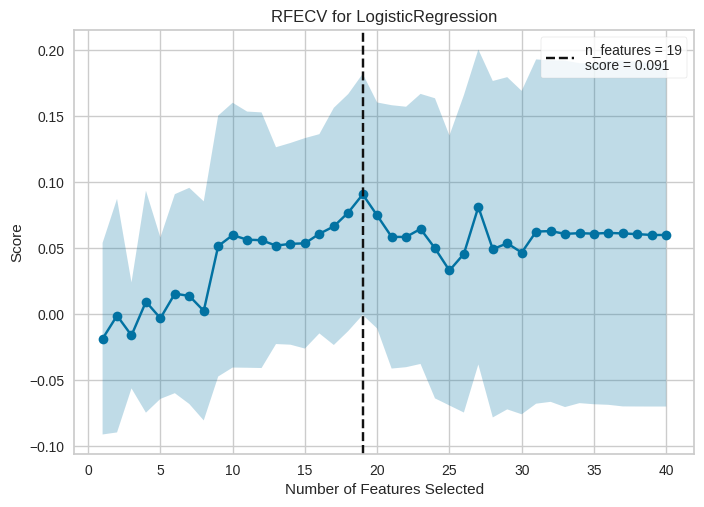

<Axes: title={'center': 'RFECV for LogisticRegression'}, xlabel='Number of Features Selected', ylabel='Score'>

In [ ]:
mcc_scorer = make_scorer(matthews_corrcoef)
rfecv = RFECV(estimator=LogisticRegression(random_state = 123, class_weight='balanced', C=200, dual=False, solver='liblinear'),
              cv=StratifiedKFold(10),
              scoring =  mcc_scorer)
rfecv.fit(X_train_std, y_train.values.ravel())
rfecv.show()

In [ ]:
mask = rfecv.get_support()
columns = X_train_corw.columns
selected_cols = columns[mask]
n_features5 = len(selected_cols)
X_train_rfe = pd.DataFrame(rfecv.transform(X_train_outlayer), columns = selected_cols)
X_test_rfe = pd.DataFrame(rfecv.transform(X_test_outlayer), columns = selected_cols)

In [ ]:
time, f1score, mccscore = evaluate(train_df = X_train_rfe, test_df = X_test_rfe, train_target=y_train, test_target=y_test)
print(f' Training time: {time}ms\n F1 Score: {f1score}\n MCC Score: {mccscore}')
f1scores.append(f1score)
mccscores.append(mccscore)
times.append(time)

 Training time: 490ms
 F1 Score: 0.9285714285714286
 MCC Score: -0.019086611143795607


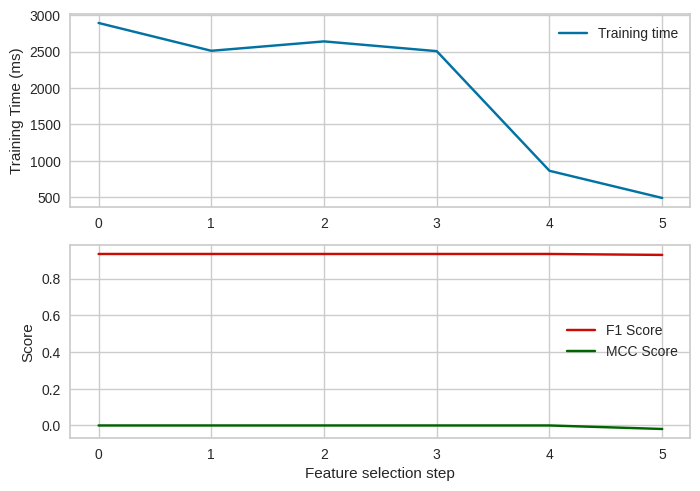

In [ ]:
fig, (ax0, ax1) = plt.subplots(2, 1)
ax0.plot(times, label='Training time')
ax0.set(ylabel='Training Time (ms)')
ax1.plot(f1scores, label='F1 Score', c='r')
ax1.plot(mccscores, label='MCC Score', c='darkgreen')
ax1.set(ylabel='Score')
ax1.set(xlabel='Feature selection step')
ax1.legend()
ax0.legend()
fig.show()

In [ ]:
undersampler = RandomUnderSampler(random_state=1)
X_train_os, y_train_os = undersampler.fit_resample(X_train_rfe, y_train)

In [ ]:
X_train_os

,43,62,67,100,180,196,197,201,204,205,316,336,337,385,468,476,562,563,587
0,354.7673,107.9827,1.0015,0.0000,20.74,6.43,23.67,6.43,0.1409,11.86,5.9026,9.8057,1.7986,0.0061,75.4051,14.0681,262.466,0.6167,0.0271
1,353.6709,116.1818,0.9758,0.0002,14.42,11.59,20.76,11.59,0.1604,7.69,4.4137,10.0005,3.7869,0.0056,62.3911,26.6958,264.272,0.5969,0.0166
2,349.4655,116.1818,0.9758,-0.0003,18.38,10.53,22.19,10.53,0.1604,7.69,5.3607,9.0601,3.3789,0.0044,209.3439,26.1277,262.644,0.6400,0.0155
3,349.0073,112.4009,1.0967,0.0005,20.55,4.93,17.35,4.93,0.1210,5.34,6.2071,7.8658,1.3561,0.0000,129.7989,11.0357,264.272,0.5671,0.0112
4,352.8691,116.7873,1.0656,0.0001,19.83,6.77,22.12,6.76,0.1994,8.01,6.0207,9.0601,2.0553,0.0000,0.0000,18.7123,264.272,0.5671,0.0268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,347.3745,123.0118,0.8267,-0.0001,20.06,12.73,20.48,12.73,0.1731,5.90,5.9525,11.1844,3.3331,0.0000,563.7288,20.9355,264.272,0.5671,0.0080
152,350.6864,118.7609,1.1104,0.0001,16.65,12.13,24.64,12.13,0.2456,9.74,5.7186,9.0601,3.4843,0.0000,312.3361,22.1172,264.784,0.8517,0.0150
153,361.1227,112.6336,0.9460,-0.0004,22.99,10.34,23.04,10.34,0.0857,5.79,6.8876,8.5884,2.7744,0.0000,0.0000,9.0618,274.256,0.6197,0.0181
154,350.9173,106.8364,0.8803,0.0005,15.03,4.85,20.30,4.85,0.1604,7.69,5.1169,9.9557,1.5550,0.0052,168.7223,16.2763,264.272,0.5969,0.0098


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train_rfe

,43,62,67,100,180,196,197,201,204,205,316,336,337,385,468,476,562,563,587
0,350.5018,114.8573,1.0223,-0.0001,16.56,4.66,17.60,4.66,0.1604,9.31,5.3370,8.3743,1.5036,0.0098,31.8187,16.2763,257.318,0.6740,0.0121
1,357.5045,116.1818,0.9758,0.0000,17.63,6.77,19.36,6.76,0.1604,7.69,5.6552,9.0601,2.0553,0.0054,0.0000,16.2763,261.810,0.7251,0.0069
2,361.9427,129.0582,1.0232,-0.0001,18.15,7.01,21.38,7.01,0.1604,7.69,5.9941,11.5058,1.6351,0.0044,24.0136,16.2763,263.738,0.6633,0.0086
3,350.7564,118.5455,1.0917,0.0000,17.46,7.97,19.36,7.97,0.1570,7.69,5.4007,10.5719,2.6695,0.0051,0.0000,14.3833,269.118,0.6418,0.0226
4,347.7727,127.7600,0.8442,-0.0005,17.93,7.95,18.02,7.95,0.1207,6.46,5.1140,8.4329,2.2953,0.0000,328.3890,14.2953,251.880,0.9001,0.0077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,353.7491,122.4673,0.8396,0.0004,17.61,9.83,22.63,9.83,0.0604,10.27,5.5404,9.7330,2.6981,0.0000,318.0294,7.1967,264.272,0.5671,0.0095
1171,355.8500,119.3100,1.0249,0.0000,18.70,3.52,18.11,3.52,0.1526,5.71,6.4426,9.8378,1.1053,0.0054,85.8727,14.8925,264.272,0.5671,0.0135
1172,345.6836,119.1591,0.9321,0.0003,20.68,7.73,15.59,7.73,0.2151,5.93,6.1777,10.3312,2.0442,0.0000,368.2547,23.0732,264.272,0.5671,0.0071
1173,365.2182,112.8691,1.0258,0.0000,18.16,8.53,17.39,8.53,0.1041,5.11,5.6383,8.0786,2.6285,0.0077,50.8013,10.1527,264.272,0.5969,0.0144


In [ ]:
 from sklearn.tree import DecisionTreeClassifier
 from sklearn.metrics import accuracy_score
 import sklearn.metrics as metrics

In [ ]:

DT = LogisticRegression()
## Training DT
DT = DT.fit(X_train_os, y_train_os)
## Predicting response on Test
y_pred = DT.predict(X_test_rfe)
DT_A2 = metrics.accuracy_score(y_test, y_pred)*100
DT_R2 = metrics.recall_score(y_test, y_pred)*100
DT_P2 = metrics.precision_score(y_test, y_pred)*100
DT_F2 = metrics.f1_score(y_test, y_pred)*100
print('Accuracy: %.2f%% ' % DT_A2)
print("Recall_Accuracy: %.2f%%" % DT_R2)
print("Precision_Accuracy: %.2f%%" % DT_P2)
print("F1 Score: %.2f%%" % DT_F2 )

Accuracy: 63.27% 
Recall_Accuracy: 64.21%
Precision_Accuracy: 94.76%
F1 Score: 76.55%


In [ ]:
## Decision Tree
DT = DecisionTreeClassifier()
## Training DT
DT = DT.fit(X_train_os, y_train_os)
## Predicting response on Test
y_pred = DT.predict(X_test_rfe)
DT_A2 = metrics.accuracy_score(y_test, y_pred)*100
DT_R2 = metrics.recall_score(y_test, y_pred)*100
DT_P2 = metrics.precision_score(y_test, y_pred)*100
DT_F2 = metrics.f1_score(y_test, y_pred)*100
print('Accuracy: %.2f%% ' % DT_A2)
print("Recall_Accuracy: %.2f%%" % DT_R2)
print("Precision_Accuracy: %.2f%%" % DT_P2)
print("F1 Score: %.2f%%" % DT_F2 )

Accuracy: 52.55% 
Recall_Accuracy: 51.91%
Precision_Accuracy: 95.00%
F1 Score: 67.14%


In [ ]:
from xgboost import XGBClassifier

In [ ]:
## XGB Boost
XGB = XGBClassifier()
## Training Model
XGB = XGB.fit(X_train_os, y_train_os)
## Predicting response on Test
y_pred = XGB.predict(X_test_rfe)
XGB_A2 = metrics.accuracy_score(y_test, y_pred)*100
XGB_R2 = metrics.recall_score(y_test, y_pred)*100
XGB_P2 = metrics.precision_score(y_test, y_pred)*100
XGB_F2 = metrics.f1_score(y_test, y_pred)*100
print("Accuracy: %.2f%%" % XGB_A2)
print("Recall_Accuracy: %.2f%%" % XGB_R2)
print("Precision_Accuracy: %.2f%%" % XGB_P2)
print("F1 Score: %.2f%%" %XGB_F2)

Accuracy: 59.44%
Recall_Accuracy: 60.11%
Precision_Accuracy: 94.42%
F1 Score: 73.46%


In [ ]:
## Random Forest
RF = RandomForestClassifier()
## Training Model
RF = RF.fit(X_train_os, y_train_os)
## Predicting response on Test
y_pred = RF.predict (X_test_rfe)
RF_A2 = metrics.accuracy_score(y_test, y_pred)*100
RF_R2 = metrics.recall_score(y_test, y_pred)*100
RF_P2 = metrics.precision_score(y_test, y_pred)*100
RF_F2 = metrics.f1_score(y_test, y_pred)*100
print("Accuracy: %.2f%%" % RF_A2)
print("Recall_Accuracy: %.2f%%" % RF_R2)
print("Precision_Accuracy: %.2f%%" % RF_P2)
print("F1 Score: %.2f%%" % RF_F2)

Accuracy: 65.05%
Recall_Accuracy: 65.57%
Precision_Accuracy: 95.62%
F1 Score: 77.80%


In [ ]:
from sklearn.svm import SVC

In [ ]:
svcm = SVC(kernel='sigmoid')
svcm = svcm.fit(X_train_os, y_train_os)

y_pred = svcm.predict(X_test_rfe)

SVCM1 = metrics.accuracy_score(y_test, y_pred)*100
SVCM2 = metrics.recall_score(y_test, y_pred)*100
SVCM3 = metrics.precision_score(y_test, y_pred)*100
SVCM4 = metrics.f1_score(y_test, y_pred)*100
print("Accuracy: %.2f%%" % SVCM1)
print("Recall_Accuracy: %.2f%%" % SVCM2)
print("Precision_Accuracy: %.2f%%" % SVCM3)
print("F1 Score: %.2f%%" % SVCM4)


Accuracy: 64.29%
Recall_Accuracy: 65.03%
Precision_Accuracy: 95.20%
F1 Score: 77.27%


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from tensorflow.keras.layers import Dense



In [ ]:
##Neural Network
NN = Sequential()
NN.add(Dense(51, input_dim = 19, activation = 'relu'))
NN.add(Dense(27, activation = 'relu'))
NN.add(Dense(15, activation = 'relu'))
NN.add(Dense(9, activation = 'relu'))
NN.add(Dense (6, activation = 'relu'))

NN.add(Dense(2, activation = 'sigmoid'))
NN.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:


Neural_N3 = NN.fit(X_train_os, y_train_os, epochs=25, batch_size= 60)

Epoch 1/25
3/3 [==============================] - 1s 8ms/step - loss: 21.8361 - accuracy: 0.5000
Epoch 2/25
3/3 [==============================] - 0s 4ms/step - loss: 11.6874 - accuracy: 0.4744
Epoch 3/25
3/3 [==============================] - 0s 5ms/step - loss: 4.3504 - accuracy: 0.5064
Epoch 4/25
3/3 [==============================] - 0s 4ms/step - loss: 4.5850 - accuracy: 0.4936
Epoch 5/25
3/3 [==============================] - 0s 4ms/step - loss: 5.2837 - accuracy: 0.5000
Epoch 6/25
3/3 [==============================] - 0s 4ms/step - loss: 3.0780 - accuracy: 0.5000
Epoch 7/25
3/3 [==============================] - 0s 5ms/step - loss: 1.2847 - accuracy: 0.5128
Epoch 8/25
3/3 [==============================] - 0s 4ms/step - loss: 2.3525 - accuracy: 0.5000
Epoch 9/25
3/3 [==============================] - 0s 4ms/step - loss: 1.9283 - accuracy: 0.5128
Epoch 10/25
3/3 [==============================] - 0s 5ms/step - loss: 1.1733 - accuracy: 0.5256
Epoch 11/25
3/3 [====================

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [ ]:
y_pred = NN.predict(X_test_rfe)
pred = list()
for i in range(len(y_pred)):
    pred.append(np. argmax(y_pred[i]))
NN_3 = accuracy_score(pred,y_test)*100
NN_4 = recall_score(pred,y_test)*100
NN_5 = precision_score(pred,y_test)*100
NN_6 = f1_score(pred,y_test)*100

print('Accuracy is: %.2f%%' % NN_3)
print('Recall_score is: %.2f%%' % NN_4)
print('Precision_score is: %.2f%%' % NN_5)
print("F1_score is: %.2f%%" % NN_6)

13/13 [==============================] - 0s 1ms/step
Accuracy is: 63.78%
Recall_score is: 95.53%
Precision_score is: 64.21%
F1_score is: 76.80%
